# Python Lectures - Diego, Heliana, Facundo

## Lecture 1 - 27/04

### 1. Introdução ao curso e conversa informal

#### Assuntos discutidos:

A ideia do curso é aprender como a usar programação voltada a estruturas de larga escala (LSS).

Breve discussão sobre o quanto cada um sabe/utiliza. Como por exemplo, mexer com dados, histogramas, etc.

#### Pacotes e outros necessários

1. NumPy
2. MatPlotLib
3. Pandas
4. astropy (fits, cosmology)
5. stats
6. scipy
7. healpy

#### Catálogos

1. DR16_v4.fits
2. QSos catalogue
3. SDSS survey

### 2. Introdução - Fits e uso de catálogos

Heliana está demonstrando como utilizarmos os dados, extraindo informações dele. Demosntrações diretas.

#### Como extrair informações de um catálogo

#### Obtendo angular distribution of quasars from SLOAN

#### Limpando os dados

#### Dados do Sloan

##### https://www.sdss4.org/dr16/algorithms/qso_catalog

##### https://data.sdss.org/datamodel/files/BOSS_QSO/DR16Q/DR16Q_v4.html

### 3. Colocando em prática

#### Testando os dados

In [3]:
import astropy.io.fits as fits

In [75]:
hdul = fits.open('DR16Q_v4.fits')

In [76]:
hdul.info

<bound method HDUList.info of [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f309c2153d0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f309c255df0>]>

In [4]:
import numpy as np
import matplotlib.pyplot as plt

(array([4.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 7.5041e+05]),
 array([-999.        , -898.39760828, -797.79521656, -697.19282484,
        -596.59043312, -495.9880414 , -395.38564968, -294.78325796,
        -194.18086624,  -93.57847452,    7.0239172 ]),
 <BarContainer object of 10 artists>)

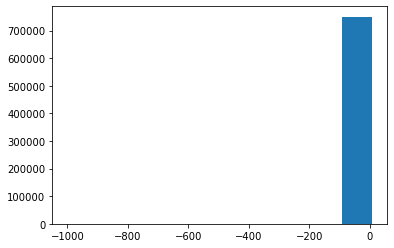

In [77]:
plot.hist(hdul[1].data['Z'])

#### Repetindo o script da aula

In [23]:
with fits.open('DR16Q_v4.fits') as catalog:
    data0 = catalog[1].data
    
cols = catalog[1].columns # column names

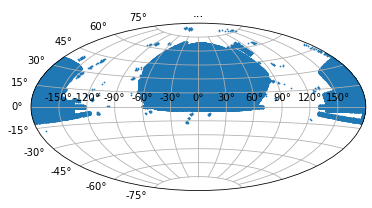

In [27]:
plt.figure()
plt.subplot(111, projection = 'aitoff')
plt.grid(True)
plt.scatter((data0['RA']-180.)*np.pi/180., (data0['Dec'])*np.pi/180., s = 0.5)
plt.title('...')
plt.show()

#### Selecionando dos dados: z > 0

In [28]:
data = data0[data0['Z'] > 0.] #clean non defined values

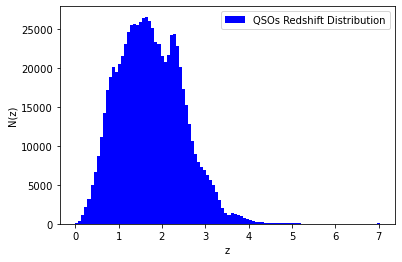

In [30]:
plt.hist(data['Z'], bins = 100, color = 'blue', alpha = 1., label = 'QSOs Redshift Distribution')
plt.legend()
plt.xlabel('z')
plt.ylabel('N(z)')
plt.show()

#### Selecionando dos dados: $-30 < M_I < -22$

In [46]:
data_m_22_30 = data0[(data0['M_I'] < -22.) & (data0['M_I'] > -30)]

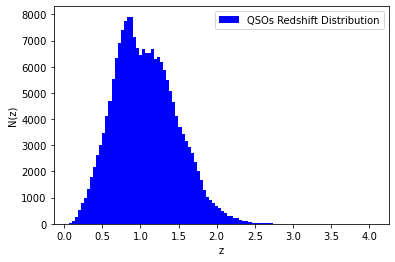

In [33]:
plt.hist(data_m_22_24['Z'], bins = 100, color = 'blue', alpha = 1., label = 'QSOs Redshift Distribution')
plt.legend()
plt.xlabel('z')
plt.ylabel('N(z)')
plt.show()

#### Plot: Magnitude 'M_I' por Redshift 'Z'

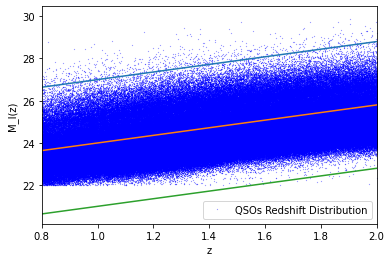

In [73]:
def f(x):
    return 1.8*x + 23.2

#print(f(1))

plt.plot(data_m_22_30['Z'], -data_m_22_30['M_I'], 'b.', markersize = 0.3, alpha = 1., label = 'QSOs Redshift Distribution')
#plt.plot(data_m_22_30['Z'], data_m_22_30['Z'])
plt.plot(x, 25.2 + 1.8*x)
plt.plot(x, 22.2 + 1.8*x)
plt.plot(x, 19.2 + 1.8*x)
#plt.scatter
plt.legend()
plt.xlabel('z')
plt.ylabel('M_I(z)')
plt.xlim(0.8, 2)
#plt.ylim(30, 22)
plt.show()

## Lecture 2 - 04/05

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
from astropy.io import fits 
from astropy.table import Table
from astropy import units as u
from astropy.cosmology import Planck18
from astropy.coordinates import Distance as Distance
import pickle

### 1. Catálogo e Seleção de Dados

#### Selecionando a pasta

Primeiramente, devemos selecionar onde estão nossos arquivos. Principalmente onde estão os dados, ou seja, o arquivo .fits do catálogo.

#### Selecionando os dados necessários -- Repetindo filtragem

Agora precisamos buscar os dados e salvar a mostra que queremos. No caso abaixo, vamos selecionar os dados onde o redshift $z$ está no intervalo $0.8 < z < 2.2$.

### 2. Coordenadas Utilizadas

Agora, vamos mostrar as diferentes formas de fazer gráficos com os dados puxados acima. Em primeiro momento, vamos usar apenas as coordenadas 'RA' e 'DEC', ou seja, ascensão reta e declinação.

#### Plot simples, usando RA e DEC

Um detalhe importante é que a coordenadas 'RA' está plotada entre 180º e -180º graus.

Ou seja, precisamos ajustar os dados para que eles fiquem nesse range de valores da ascensão reta, ao invés de 0 e 360º

### 3. Plot com o Healpy

#### Projeção de Mollweide

Utilizando o Healpy, podemos:

1. Criamos um conjunto de dados, de tamanho 'nside'
2. Esse tamanho é inserido dentro de hp.nside2npix, que fornece a quantidade de pixels totals dado o 'nside'
3. A quantidade de pixeis é usada dentro de np.ones, justamente para indicar que os pixels estão sendo preenchidos, e isso fornece os dados 'm'
4. Esses dados entram dentro de 'mollview', que é um tipo de plot na projeção de Mollweide.
5. Finalmente, usamos 'projscatter', que finalmente plota os dados 'D_mostra' nas coordenadas que desejamos, justamente na projeção de Mollweide que indicamos acima

Esse plot está com os dados entre 0 e 360º

#### Modificando o range da ascensão reta: -180º até 180º

#### Juntando os dois plots

Quando juntamos os dois plots, vemos que as partes centrais e externas são trocadas

### 4. Máscara da Via Láctea

https://wiki.cosmos.esa.int/planck-legacy-archive/index.php/Lensing

Vamos utilizar a máscara da Via Láctea, que pode ser baixada no link acima. Ela será salva com o nome 'rotated_alm._mask.dat'.

Ela também está disponível no Drive do curso: https://drive.google.com/drive/folders/1PMUr2bQd8YKwXIU9q2U6DHc1K81jui8m?usp=sharing

#### Selecionando a pasta e a máscara

#### Empregando a máscara com o HealPy

Agora podemos fazer os gráficos utilizando a máscara da Via Láctea. Em ambos os casos estaremos utilizando o Healpy, da mesma forma que foi feita acima, também utilizando as duas formas de plotar, entre 0 e 360 graus e entre -180 e 180.

Usamos "pixelfunc.UNSEEN" para mascarar os pixels seguindo a indicação da máscara selecionada.

Podemos também fazer o plot utilizando os dados entre 0 e 360º, junto da máscara.

### 5. Histogramas e outros

#### Fazendo cortes utilizando a Magnitude -- Similar à pratica da aula 1

Primeiro devemos filtrar a mostra. Aqui iremos selecionar Magnitude mais forte do que -21. E em seguida plotar o histograma desses dados selecionados.

#### $M_I$ vs. $z$

Agora faremos o plot da Magnitude por Redshift, novamente similar ao feito anteriormente

#### Subsamples

Primeiro definimos uma função

Em seguida, filtramos os dados novamente

Finalmente, podemos fazer os scatter plots dos dados filtrados acima, para as subsamples desenvolvidas

### 6. Colocando em prática

In [6]:
os.chdir('/home/lfog/Documentos/LSS')

In [7]:
with fits.open('DR16Q_v4.fits') as catalog:
    table_data = Table(catalog[1].data)
    data = catalog[1].data

D_mostra = data[(data['Z']>=0.8) & (data['Z']<=2.2)]

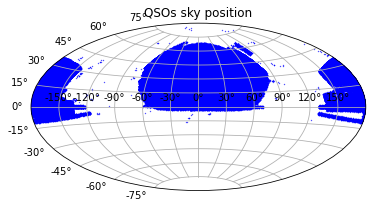

In [139]:
plt.figure()
plt.subplot(111, projection = 'aitoff')
plt.grid(True)
plt.scatter((D_mostra['RA']-180.)*np.pi/180., (D_mostra['DEC'])*np.pi/180., s = 0.1,color='blue')
plt.title('QSOs sky position')
plt.show()

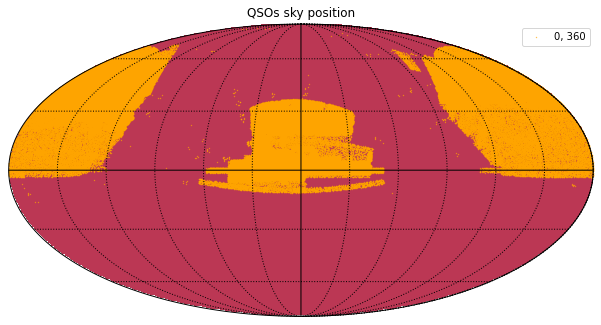

In [143]:
nside = 2048
tam = hp.nside2npix(nside)
m = np.ones(tam)
hp.mollview(m, title='QSOs sky position',cbar=False, cmap='inferno')
hp.projscatter(D_mostra['RA'], D_mostra['DEC'],lonlat=True, s=0.1, color='orange',label='0, 360')
hp.graticule()
plt.legend()
plt.show()

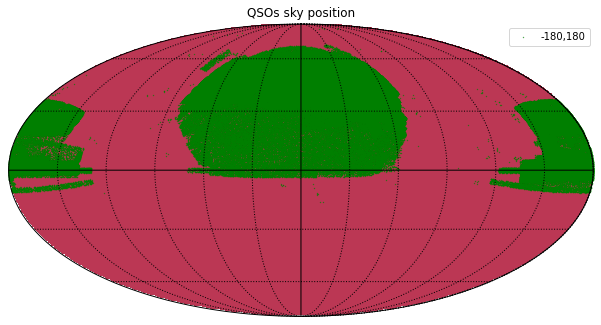

In [10]:
hp.mollview(m, title='QSOs sky position',cbar=False, cmap='inferno')
hp.projscatter(D_mostra['RA']-180, D_mostra['DEC'],lonlat=True, s=0.1,color='green', label='-180,180')
hp.graticule()
plt.legend()
plt.show()

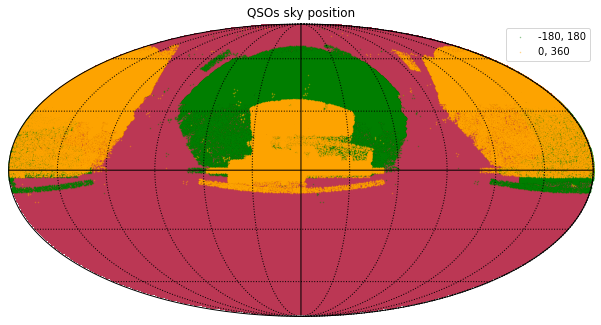

In [11]:
hp.mollview(m, title='QSOs sky position',cbar=False,cmap='inferno')
hp.projscatter(D_mostra['RA']-180, D_mostra['DEC'], lonlat=True, s=0.2, color='green', alpha=0.5, label='-180, 180')
hp.projscatter(D_mostra['RA'], D_mostra['DEC'], lonlat=True, s=0.2, color='orange', alpha = 0.5, label='0, 360')
hp.graticule()
plt.legend()
plt.show()

In [12]:
os.chdir('/home/lfog/Documentos/LSS') ### Selecionar a sua própria pasta
maskalm_fname='rotated_alm._mask.dat'

In [14]:
with open(maskalm_fname, "rb" ) as f:  
    mask_alm=pickle.load( f)

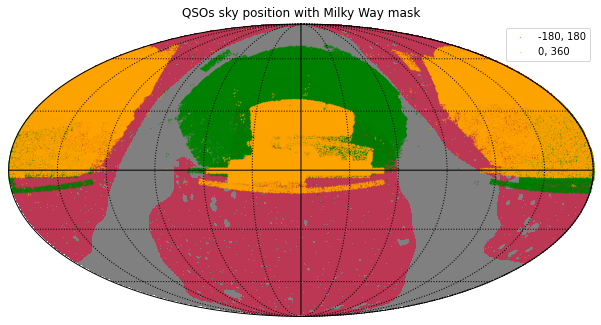

In [15]:
m[mask_alm<0.75] = hp.pixelfunc.UNSEEN
hp.mollview(m, title='QSOs sky position with Milky Way mask',cbar=False, cmap='inferno')
hp.projscatter(D_mostra['RA']-180,D_mostra['DEC'],lonlat=True, s=0.2,color='green', alpha=0.5, label='-180, 180')
hp.projscatter(D_mostra['RA'],D_mostra['DEC'],lonlat=True, s=0.2, color='orange', alpha = 0.5, label='0, 360')
hp.graticule()
plt.legend()
plt.show()

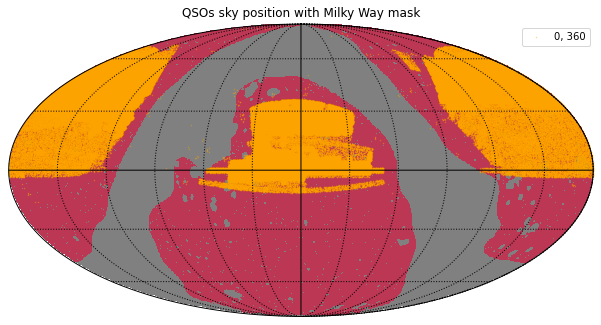

In [16]:
hp.mollview(m, title='QSOs sky position with Milky Way mask',cbar=False, cmap='inferno')
hp.projscatter(D_mostra['RA'],D_mostra['DEC'],lonlat=True, s=0.2, color='orange', alpha = 0.5,label='0, 360')
hp.graticule()
plt.legend()
plt.show()

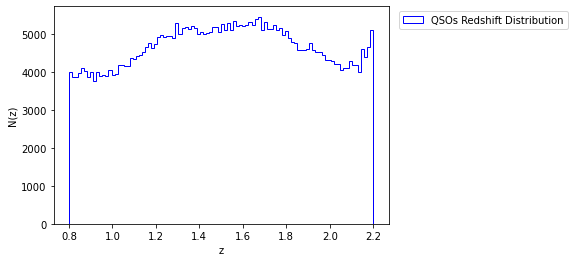

In [21]:
plt.hist(D_mostra['Z'], bins = 100, color = 'blue', alpha = 1., histtype='step',label = 'QSOs Redshift Distribution')
plt.legend(loc='upper right', bbox_to_anchor=(1.55, 1.0))
plt.xlabel('z')
plt.ylabel('N(z)')
plt.show()

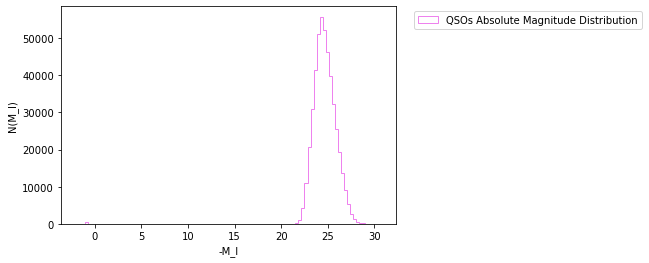

In [26]:
plt.hist(-D_mostra['M_I'], bins = 100, color = 'violet', alpha = 1., histtype='step',label = 'QSOs Absolute Magnitude Distribution')
plt.legend(loc='upper right', bbox_to_anchor=(1.75, 1.0))
plt.xlabel('-M_I')
plt.ylabel('N(M_I)')
plt.show()

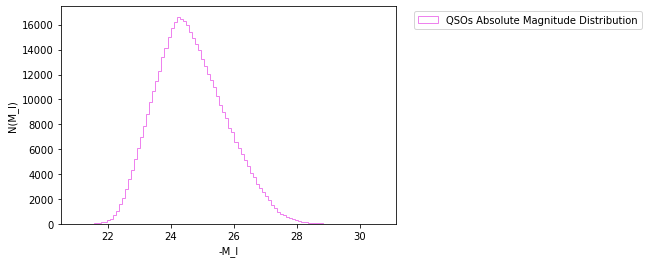

In [29]:
D_final = D_mostra[-D_mostra['M_I']>21]

plt.hist(-D_final['M_I'], bins = 100, color = 'violet', alpha = 1., histtype='step',label = 'QSOs Absolute Magnitude Distribution')
plt.legend(loc='upper right', bbox_to_anchor=(1.75, 1.0))
plt.xlabel('-M_I')
plt.ylabel('N(M_I)')
plt.show()

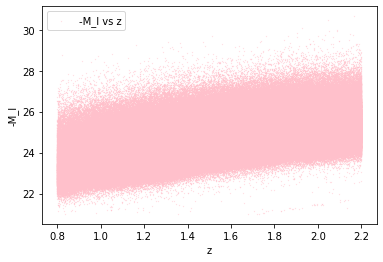

In [28]:
plt.scatter(D_final['Z'],-D_final['M_I'], s=0.09, c='pink', marker="2",label='-M_I vs z')
plt.legend()
plt.xlabel('z')
plt.ylabel('-M_I')
plt.show()

In [30]:
def f(a,x):
    return a+1.8*(x-0.8)

In [31]:
D_1 = D_final[-D_final['M_I']>f(25,D_final['Z'])]
#D_2 = D_final[-D_final['M_I']<f(22.3,D_final['Z'])]
D_2 = D_final[(-D_final['M_I']<f(22.3,D_final['Z'])) & ((-D_final['M_I']>f(21.3,D_final['Z'])))]
z_range = np.linspace(0.8,2.2,50)

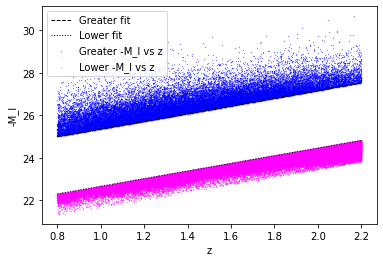

In [32]:
plt.scatter(D_1['Z'],-D_1['M_I'], s=0.09, c='blue', marker="2",label='Greater -M_I vs z')
plt.scatter(D_2['Z'],-D_2['M_I'], s=0.09, c='magenta', marker="2",label='Lower -M_I vs z')
plt.plot(z_range,f(25,z_range), lw=1, c='black',linestyle='dashed',label='Greater fit')
plt.plot(z_range,f(22.3,z_range), lw=1, c='black',linestyle='dotted',label='Lower fit')
plt.legend()
plt.xlabel('z')
plt.ylabel('-M_I')
plt.show()

### Bônus: Passando para Coordenadas Galacticas 

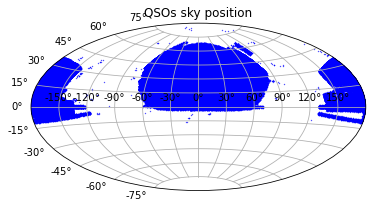

In [90]:
plt.figure()
plt.subplot(111, projection = 'aitoff')
plt.grid(True)
plt.scatter((D_mostra['RA'] - 180.)*np.pi/180., (D_mostra['DEC'])*np.pi/180., s = 0.1,color='blue')
plt.title('QSOs sky position')
plt.show()

#### Utilizando o SkyCoord para mudança de Coordenadas

In [92]:
from astropy.coordinates import SkyCoord

O SkyCoord permite a troca de sistemas de coordenadas facilmente, basta utilizar as classes certas.

Primeiro, criamos as coordenadas dos nossos pontos dentro do SkyCoord

In [127]:
c_icrs = SkyCoord(ra = (D_mostra['RA'])*u.degree, dec=D_mostra['DEC']*u.degree, frame='icrs')

Agora iremos plotar as coordenadas utilizando as classes **galactic**, que transforma em coordenadas galáticas, e especificando que queremos primeiro as coordenadas $l$ e na sequência as coordenadas $b$. Vale notar que usamos ainda **wrap_at('180d')** para plotar entre 180 e -180, ao invés de entre 0 e 360.

Também iremos usar **.rad**, para passar os ângulos para radianos.

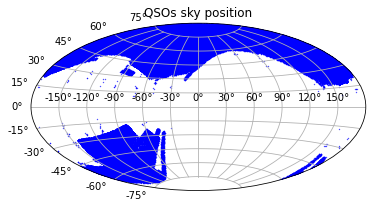

In [128]:
plt.figure()
plt.subplot(111, projection = 'aitoff')
plt.grid(True)
plt.scatter(-c_icrs.galactic.l.wrap_at('180d').rad, c_icrs.galactic.b.rad, s = 0.1, color='blue')
plt.title('QSOs sky position')
plt.show()

Uma alternativa ao **wrap_at('180d')** é fazer o cálculo com $-\pi$, que fará o ângulo modificar para entre 180º e -180º

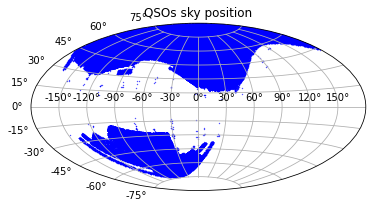

In [132]:
plt.figure()
plt.subplot(111, projection = 'aitoff')
plt.grid(True)
plt.scatter(-np.pi + c_icrs.galactic.l.rad, c_icrs.galactic.b.rad, s = 0.1, color='blue')
plt.title('QSOs sky position')
plt.show()

Abaixo eu apenas defini as coordenadas usando outro frame, porque eu não tinha certeza em qual frame as coordenadas originais estavam.

In [129]:
c_tete = SkyCoord(ra = (D_mostra['RA'])*u.degree, dec=D_mostra['DEC']*u.degree, frame='tete')

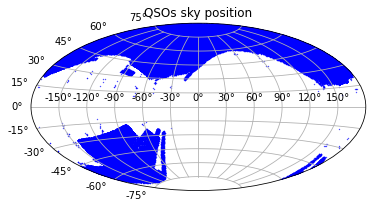

In [130]:
plt.figure()
plt.subplot(111, projection = 'aitoff')
plt.grid(True)
plt.scatter(-c_tete.galactic.l.wrap_at('180d').rad, c_tete.galactic.b.rad, s = 0.1, color='blue')
plt.title('QSOs sky position')
plt.show()

In [ ]:
mapa_icrs = SkyCoord(ra = ()*u.degree, ()*u.degree, frame='icrs')

## Lecture 3 - 11/05

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
from astropy.io import fits 
from astropy.table import Table
from astropy import units as u
from astropy.cosmology import Planck18
from astropy.coordinates import Distance as Distance
import pickle
import pandas as pd

### 1. Introdução: Catálogo de Comparação

Na aula de hoje, vamos fazer um catálogo de comparação com o que estamos utilizando (Quasares do SLOAN).

Esse catálogo de comparação, **random**, será utilizado para melhor analisarmos as propriedades do catálogo do SLOAN: comparação com um catálogo aleatório nos fornece informações a respeito das **correlações** presentes no catálogo de quasares.

#### Correlação de dois pontos vs. Distribuição Aleatória

Relembrando o que o Diego comentou nas aulas teóricas, a respeito das correçaões de dois pontos

$ \xi(r) = \dfrac{DD(r)}{RR(r)} - 1 $

A distribuição de quasares possui alguns viéses, não é uma distribuição uniforme no céu.

A distribuição aleatória possui dados nas regiões em que o catálogo do SLOAN não possui. Isso é um problema.
Precisamos garantir que o catálogo aleatória tenha **o volume com a mesma forma** do catálogo do SLOAN. Eles precisam ter a **mesma forma e mesmo volume**

#### Distribuição Aleatória e Volume dos dados

Para fazer isso, vamos testar se as coordenadas aleatórias estão dentro das regiões presentes no catálogo do SLOAN -- ver os mapas feitos no HealPy, itens 3 e 4 da aula #2.

### 2. Seleção de Dados

Para simplificar a análise, vamos reduzir a base de dados que iremos analisar. Vamos guardar apenas algumas informações: RA, DEC, Z, além de estarmos utilizando a mesma faixa de redshifts Z de D_mostra (vamos refazer o procedimento)

#### Procedimento da Lecture 2

#### Alternativa: código da Heliana

### 3. Máscara dos dados -- Dados Reais

A ideia é fazer uma máscara que tem resolução mais baixa que o mapa de quasares.

Se não fizermos assim, vamos estar contando quasares ao invés de selecionar uma área onde os quasares estão.

#### Distribuição dos Dados -- Resolução

Precisamos escolher a área dos dados, e vamos selecionar uma resolução de 32x32 pixels.

#### Histograma com a distribuição de quasares da seleção que estamos usando

### 4. Máscara de Dados -- Construção

Podemos mostrar que os quasares estão realmente dentro da área da máscara criada.

Existem áreas com menos dados, mas todos os quasares do catálogo estão presentes dentro da área.

#### Área da máscara a partir de quadrados de 32x32 pixels

#### Comparando a máscara com os dados reais

Podemos ver abaixo que os dados reais estão distribuídos apenas dentro da máscara que criamos

### 5. Dados Aleatórios dentro da Máscara

Em seguida, vamos criar o catálogo random **dentro** dessa área da máscara acima. Afinal, queremos que o esse catálogo de comparação tenha a mesma forma do catálogo de quasares -- ambos dentro da área da máscara.

Para fazer isso, usamos um loop para garantir que os pontos random estão dentro dessa área.

#### Loop das posições aleatórias na máscara

Vamos selecionar uns 10000 pontos aleatórios dentro dessa área, no exemplo da Heliana. Mas podemos utilizar mais pontos, basta alterar o código.

No final das contas, vamos preferir as áreas externas da máscara/dos dados, porque são áreas maiores. Vamos ignorar a área central.

Isso é possível porque temos muitos dados, isso não será problemático. Poderemos desconsiderar parte dos dados.

#### Gráfico dos pontos dentro da máscara

Plotamos então os dados aleatórios definidos acima, e vemos que eles estão justamente acima da área definida

### 6. Distribuição de Redshifts

Para experimentos que possuem poucos dados, essa abordagem é mais problemática.

Não só precisamos garantir os pontos aleatórios dentro da máscara. É necessário que:

1. A distribuição com redshift tenha forma similar aos dados
2. A distribuição de magnitude também precisa ser similar aos dados.

Ou seja, não só precisamos garantir que os dados random estejam na mesma área.
Mas as **distribuições precisam estar alinhadas com redshift e magnitude.**

#### Função para filtragem futura

Primeiro devemos criar uma função que será usada para construirmos dados aleatórios com distribuição de redshift similar a dos dados reais.

#### Distribuição Cumulativa da Distribuição de Redshift de QSOs

A distribuição de redshifts que queremos emular pode ser obtida abaixo. Os dados aleatórios devem apresentar distribuição similar

### 7. Dados Aleatórios seguindo distribuição de Redshift dos QSOs

Finalmente, podemos construir os dados aleatórios usando a função definida anteriormente, aliada a um loop que selecionará os dados

#### Comparando as distribuições

Comparando as distribuições, vemos que fomos bem sucedidos em criar dados aleatórios com uma distribuição de redshift similar aos dados originais do SLOAN para QSO's.

Dica para a próxima aula: procurar a biblioteca coorfunc ou pycorr, que utilizaremos para calcular funções de correlação.

### 8. Colocando em prática

In [2]:
import pandas as pd

In [3]:
qso_data='DR16Q_v4.fits'

zmin=0.8
zmax=2.2

fileout='data/qso_subset_08_22.dat'

def qso_sub(qso_data,zmin,zmax,fileout):

    with fits.open(qso_data) as catalog:
        data0 = catalog[1].data

    data=data0[(data0['Z']>zmin)&(data0['Z']<zmax)] #---> z slice

    datasave=np.vstack([data['RA'],data['DEC'],data['Z']])                                                                                                              
    np.savetxt(fileout,datasave.T)

    print('qso number',len(data['RA']))

qso_sub(qso_data,zmin,zmax,fileout) #call only once per sample

qso number 465157


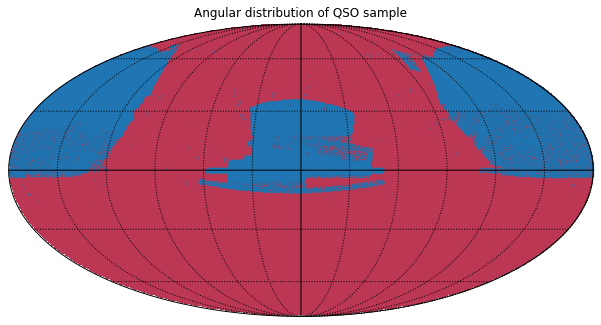

In [6]:
colnames=['ra', 'dec', 'z']
D = pd.read_csv(fileout, delimiter=' ', names = colnames)

nside = 32 #select healpy map resolution (pixel size)

background_healpix_map=np.zeros(hp.nside2npix(nside))
hp.mollview(background_healpix_map, title = 'Angular distribution of QSO sample', cbar=False, cmap='inferno')
hp.graticule()
hp.projscatter(D['ra'], D['dec'], lonlat=True, s=0.05, label = 'QSO z doistribution')
plt.show()

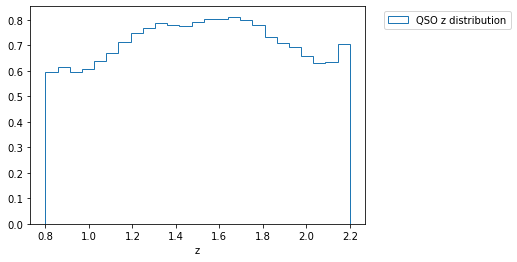

In [12]:
plt.hist(D['z'], density = True, bins = 25, histtype = 'step', label = 'QSO z distribution')
plt.legend(loc='upper right', bbox_to_anchor=(1.45, 1.0))
plt.xlabel('z')
plt.show()

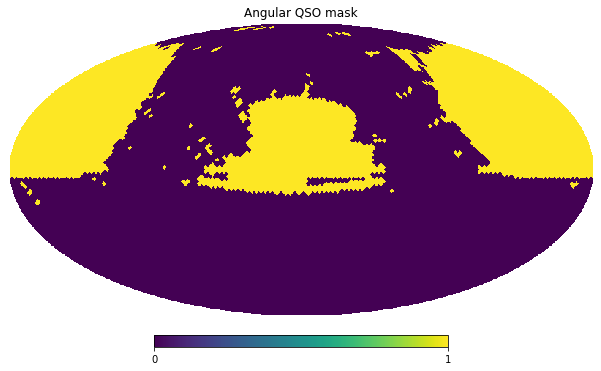

In [13]:
def make_ang_mask(nside,Dra,Ddec):

    mask=np.zeros(hp.nside2npix(nside))

    veclist=hp.ang2vec(Dra,Ddec,lonlat=True)

    pix=hp.vec2pix(nside,veclist[:,0],veclist[:,1],veclist[:,2])

    mask[pix]=1

    return(mask)

qso_ang_mask=make_ang_mask(nside,D['ra'],D['dec'])

hp.mollview(qso_ang_mask,title='Angular QSO mask')
plt.show()

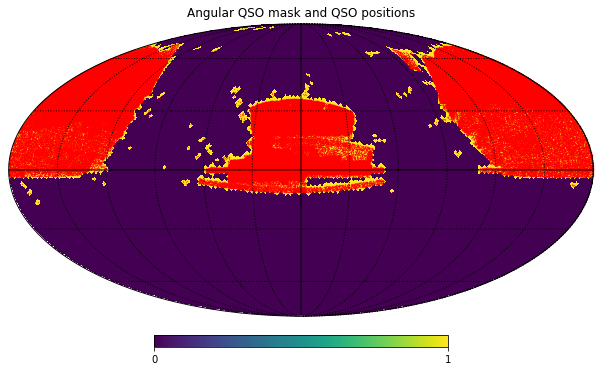

In [14]:
hp.mollview(qso_ang_mask,title='Angular QSO mask and QSO positions')
hp.graticule()
hp.projscatter(D['ra'],D['dec'],lonlat=True,s=0.05,color='red') #plot RA DEC of QSO catalogue
plt.show()

In [15]:
#Nran=len(D['z'])
Nran=10000

RAran = np.zeros(Nran)
DECran = np.zeros(Nran)

nr=0

while(nr<Nran):

    RArand = np.random.uniform(0,360.,1)

    cosdec = np.random.uniform(-1,1,1)
    DECrand = np.arccos(cosdec)*180./np.pi-90.

    pix=hp.ang2pix(nside,RArand,DECrand,lonlat=True)

    if(qso_ang_mask[pix]==1):

        RAran[nr]=RArand
        DECran[nr]=DECrand

        nr=nr+1

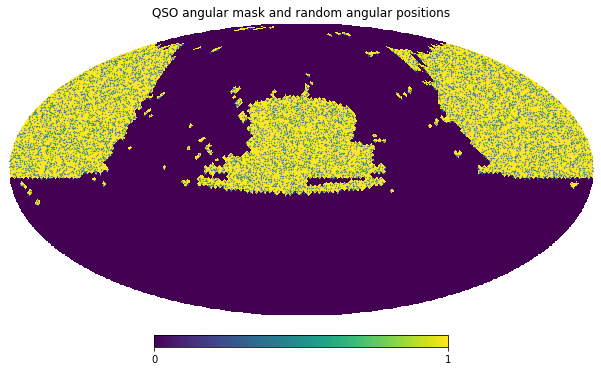

In [16]:
hp.mollview(qso_ang_mask,title='QSO angular mask and random angular positions')
hp.projscatter(RAran,DECran,lonlat=True,s=0.1)
plt.show()

In [17]:
# function to find y knowing x............................
def find_x(x,y,y0,nbins):
    for i in range(1,nbins-1):
        x0=-99.
        if((y[i-1]<y0)&(y[i+1]>y0)):
            x0 = x[i]
            break
    return(x0)

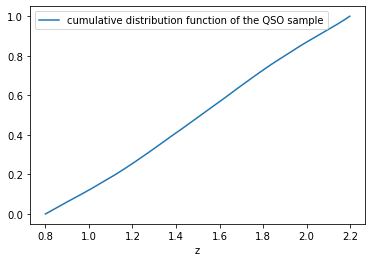

In [18]:
Nbins=1000

count, bins_count = np.histogram(D['z'], bins=Nbins)
pdf = count / sum(count)
cdf = np.cumsum(pdf)

plt.plot(bins_count[0:Nbins],cdf,label='cumulative distribution function of the QSO sample')
plt.legend()
plt.xlabel('z')
plt.show()

In [19]:
Zran=np.zeros(Nran)
np.random.seed()

for i in range(Nran):

    rndY=np.random.random()

    Zran[i]=find_x(bins_count[0:Nbins],cdf,rndY,Nbins)
    while(Zran[i]==-99.):
        rndY=np.random.random()
        Zran[i]=find_x(bins_count[0:Nbins],cdf,rndY,Nbins)

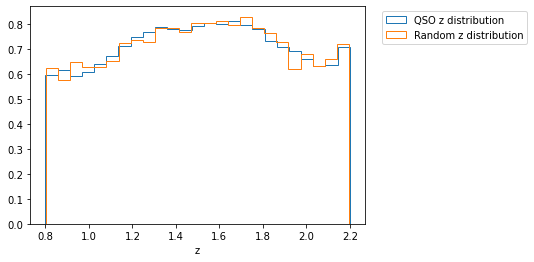

In [22]:
plt.hist(D['z'],density=True,bins=25,histtype='step',label='QSO z distribution') 
plt.hist(Zran,density=True,bins=25,histtype='step',label='Random z distribution')
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1.0))
plt.xlabel('z')
plt.show() 